##Our task for this project is to develop a machine learning algorithm that predicts people’s loan eligibility. The input to our algorithm will be a series of personal information including gender, marriage status, number of dependents, education level, income level, loan amount etc. We then use a Random Forests Classifier to predict whether this person will be eligible for the loan. Our motivation for pursuing this problem is to explore a more efficient, transparent and consistent procedure in evaluating loan eligibility for batches of people as opposed to using human judgement on each individual loan application case, which is susceptible to human bias and error.

We downloaded data from https://www.kaggle.com/burak3ergun/loan-data-set/version/1.

In [ ]:
import pandas as pd;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler;
import numpy as np;
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.model_selection import cross_validate;
from sklearn import svm;
from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV;
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics;
import matplotlib.pyplot as plt;
from sklearn.decomposition import PCA;
import seaborn as sns;

In [ ]:
%config InlineBackend.figure_format = 'svg' 

###Import all data from the csv


In [ ]:
df = pd.read_csv("/content/loan_data_set.csv");
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


###Get rid of all rows that have missing data

###The dataset we are using contains 614 unique loan candidates. However, some of these candidates, who each have a unique loan ID, are missing data in one or more features in the given dataset. To rectify this, rather than augment the data to account for these gaps, we have decided to omit altogether the candidates with missing data in at least one feature column. After performing this pre-process we are left with 480 unique loan ID’s, each with a full row of data. We will then split this data into training, validation, and test data portions. Our initial dataset contains 11 features, excluding each candidate’s loan ID and their loan status (a binary feature which we hope to predict). Also, since our dataset is small, we need to further limit the number of features to make our model focus on more important aspects. Thus, features like gender of the candidate might be eliminated during this process. As we build our model it will become more clear which features are informative to the model, and which are not.

In [ ]:
data = df.dropna()  
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.drop(data.columns[[0, -4]], axis=1, inplace= True);
X = data.iloc[:, :-1];
y = data.iloc[:, -1];

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(X)
print(y)

     Gender Married Dependents  ... LoanAmount Credit_History  Property_Area
1      Male     Yes          1  ...      128.0            1.0          Rural
2      Male     Yes          0  ...       66.0            1.0          Urban
3      Male     Yes          0  ...      120.0            1.0          Urban
4      Male      No          0  ...      141.0            1.0          Urban
5      Male     Yes          2  ...      267.0            1.0          Urban
..      ...     ...        ...  ...        ...            ...            ...
609  Female      No          0  ...       71.0            1.0          Rural
610    Male     Yes         3+  ...       40.0            1.0          Rural
611    Male     Yes          1  ...      253.0            1.0          Urban
612    Male     Yes          2  ...      187.0            1.0          Urban
613  Female      No          0  ...      133.0            0.0      Semiurban

[480 rows x 10 columns]
1      N
2      Y
3      Y
4      Y
5      Y
      

###Preprocessing data and let all features to have numbered value

###In this step, we alter the Y/N category of the data to be binary, so as to assign a numbered value to the data. Further, we assign the quantitative measures to the categorial features via OneHotEncoder(), since random forest requires that all features/data be numeric. The module takes as input an array of data, in either integer or string form. It then uses the one-hot encoding scheme to encode the input data in a dense array. With this encoding scheme, we can easily use scikit-learn estimators, namely the random forest module. 


In [ ]:
y[y=='Y'] = 1;
y[y=='N'] = 0;
y = y.to_numpy();
y=y.astype('int');
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
X_encode = X[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']];
X_quant = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']];
X_quant = X_quant.to_numpy();
enc = MaxAbsScaler().fit(X_quant)
X_quant = enc.transform(X_quant)

enc = OneHotEncoder(handle_unknown='ignore', sparse= False)
X_encode = enc.fit_transform(X_encode)
X_ = np.c_[X_encode, X_quant]
X_

array([[0.        , 1.        , 0.        , ..., 0.0445666 , 0.21333333,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.11      ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.06968703, 0.2       ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.00709283, 0.42166667,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.31166667,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.22166667,
        0.        ]])

###Now that we have completed our pre-processing, we move on to splitting the data into train, test, and validation sets. After testing several different ways of splitting the data, we ultimately split the training and testing data 50-50, and then proceeded to split the test and validation sets 25-25. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.5, random_state=10);
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42);
print(X_train);
print(X_test);
print(X_validation);
print(type(y_train));

[[0.         1.         0.         ... 0.         0.15666667 1.        ]
 [0.         1.         1.         ... 0.         0.30833333 1.        ]
 [0.         1.         1.         ... 0.         0.13333333 0.        ]
 ...
 [0.         1.         0.         ... 0.         0.22166667 1.        ]
 [0.         1.         0.         ... 0.03782841 0.20166667 0.        ]
 [0.         1.         0.         ... 0.03632119 0.26333333 1.        ]]
[[0.         1.         0.         ... 0.04701953 0.16       1.        ]
 [0.         1.         0.         ... 0.10639241 0.36       0.        ]
 [0.         1.         0.         ... 0.07400183 0.26333333 0.        ]
 ...
 [0.         1.         0.         ... 0.06466294 0.255      1.        ]
 [1.         0.         1.         ... 0.         0.09166667 1.        ]
 [1.         0.         1.         ... 0.         0.20833333 1.        ]]
[[0.         1.         1.         ... 0.08094689 0.18333333 1.        ]
 [0.         1.         0.         ... 

#Training 
###Here we move on to the training portion of our project. We begin by training the model using Random Forest, with its default loss function and a max depth of 3. 

###Train using Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(np.r_[X_train, X_validation], np.r_[y_train, y_validation]);
print(clf.score(np.r_[X_train, X_validation], np.r_[y_train, y_validation]));
print(clf.score(X_test, y_test));

0.7944444444444444
0.85


###We see that we immediately get a high accuracy on the data; now we move on to examine the confusion matrix. 

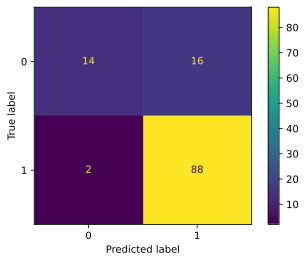

In [ ]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

###We can see that there are many false positive cases in our situation. This is not out of our expectation. As stated in our proposal, we realize that our data is really inbalanced with many cases that has result 1. We used default loss function which doesn't apply differential weights for classes. Our model learned that if it guesses the result to be 1, there is a great chance that it might actually be right. This is the reason why we get so many false positives.

##Further optimize hyperparameters choice
###We now conduct an exhaustive grid search using GridSearchCV(), which takes a set or 'grid' of parameter values and works to find the best combination of parameters for the model. This way, we are sure to optimize our parameters. 

In [ ]:
parameters = {'n_estimators':(32, 64, 128, 256), 'criterion':('gini', 'entropy'), 'max_depth': (3, 5), 'class_weight':(None, 'balanced', 'balanced_subsample'), 'min_samples_split': (2, 3, 4), 'max_features': ('auto', 'sqrt', 'log2')}
clf_ = GridSearchCV(clf, parameters, scoring='accuracy', n_jobs=-1);
clf_.fit(np.r_[X_train, X_validation], np.r_[y_train, y_validation]);

In [ ]:
print(clf_.best_params_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 128}


###Above, we display the optimal parameters outputted by our grid search.

###Train the model using better params
###Now that we have a theoretically better combination of parameters, we will apply this to our model and train it again, with Random Forest.



In [ ]:
clf_op = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=128, max_features='auto', min_samples_split=4, criterion='gini', class_weight=None)
clf_op.fit(np.r_[X_train, X_validation], np.r_[y_train, y_validation]);
print(clf_op.score(X_train, y_train));
print(clf_op.score(X_test, y_test));

0.8291666666666667
0.85


###We note that, while the training data improved in accuracy, the accuracy of our test data was unchanged.

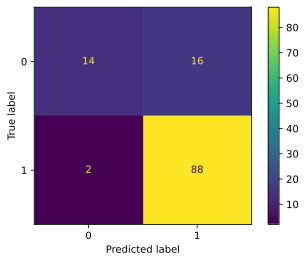

In [ ]:
predictions = clf_op.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

###We have changed the hyperparameters several times, however, the result doesn't really change much. This is happening due to the fact that we are using random forest, which consists of multiple trees. Due to the fact that our data is really limited and random forest generally performs well, we can infer that the previous random forest model already reaches the extreme extent,and thus further changes don't really make any significant differences.

###To see whether we can get our performance better, we also tried several other models as shown below. Since our data size is really small, we used cross_validate.

In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=100)
scores = cross_validate(rf, X_, y, cv=4, scoring=('accuracy','balanced_accuracy','f1','roc_auc'), return_train_score=True)
print("acc", np.mean(scores['test_accuracy']), np.std(scores['test_accuracy']))
print("**"*20)
gb = GradientBoostingClassifier(max_depth=3, random_state=0)
scores = cross_validate(gb, X_, y, cv=4, scoring=('accuracy','balanced_accuracy','f1','roc_auc'), return_train_score=True)
print("acc", np.mean(scores['test_accuracy']), np.std(scores['test_accuracy']))
print("**"*20)
gb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0)
scores = cross_validate(gb, X_, y, cv=4, scoring=('accuracy','balanced_accuracy','f1','roc_auc'), return_train_score=True)
print("acc", np.mean(scores['test_accuracy']), np.std(scores['test_accuracy']))
print("**"*20)
gb = svm.SVC(random_state=0, kernel='rbf', shrinking=True, C=1)
scores = cross_validate(gb, X_, y, cv=4, scoring=('accuracy','balanced_accuracy','f1','roc_auc'), return_train_score=True)
print("acc", np.mean(scores['test_accuracy']), np.std(scores['test_accuracy']))

acc 0.8083333333333333 0.01767766952966372
****************************************
acc 0.7895833333333333 0.0238448398797075
****************************************
acc 0.7270833333333333 0.037902927913875555
****************************************
acc 0.8083333333333333 0.01767766952966372


###We can see that none of the models actually perform better than our previous ones.

###Use Logistic Regression
###As stipulated in our deliverables, we want to test at least one other model on our data to compare to the Random Forest classifier that we constructed above. First, we ran a preliminary logistic regression classifier in which we used all default parameters. Next, we ran experiments that tested different combinations of max iterations, solver setting, and penalty norms. However, the accuracy on the test data remained the same: 85%. 

In [ ]:
clf_lr = LogisticRegression(random_state=0, max_iter=100000).fit(X_train, y_train);
clf_lr.score(X_test, y_test)

0.85

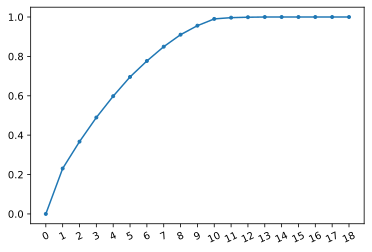

In [ ]:
exp_var = []
for i in range(X_test.shape[1]):
  pca = PCA(n_components=i)
  pca.fit(np.r_[X_train, X_validation, X_test])
  exp_var.append(sum(pca.explained_variance_ratio_))
plt.plot(np.arange(len(exp_var)), exp_var, '.-')
_ = plt.xticks(np.arange(19), rotation=25)

###Dimensionality Reduction
### We then moved on to attempt to recude the dimensionality of our data. Recall earlier, when we expressed a concern over the high number of features in our dataset. In this step, we used PCA to try and reduce dimensionality before again testing a logistic regression classifier. 
### Recall again that we started with 11 parameters, however in our encoding step (where we changed the categorial features to quantitative ones via OneHotEncoder()) the number of features in our data was transformed to 18. Using PCA, however, the dimensionality of our dataset was reduced to 11. 
###We then used this additional pre-processing scheme and applied it to our data, which we then fed through our models yet again to examine any changes in performance.

In [ ]:
pca = PCA(n_components=11)
pca.fit(np.r_[X_train, X_validation, X_test])
X_train_trans = pca.transform(X_train)
X_validation_trans = pca.transform(X_validation)
X_test_trans = pca.transform(X_test)
#print(pca.components_)

In [ ]:
clf_lr = LogisticRegression(random_state=0, max_iter=100000).fit(np.r_[X_train_trans, X_validation_trans], np.r_[y_train, y_validation]);
clf_lr.score(X_test_trans, y_test)
print(clf_lr.score(X_train_trans, y_train));
print(clf_lr.score(X_test_trans, y_test));

0.8
0.8416666666666667


In [ ]:
clf_truncated_rf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=128, max_features='auto', min_samples_split=4, criterion='gini', class_weight=None)
clf_truncated_rf.fit(np.r_[X_train_trans, X_validation_trans], np.r_[y_train, y_validation]);
print(clf_truncated_rf.score(np.r_[X_train_trans, X_validation_trans], np.r_[y_train, y_validation]));
print(clf_truncated_rf.score(X_test_trans, y_test));

0.8472222222222222
0.8333333333333334


###Note that the PCA pre-processing step did not improve our models; in fact we noticed a slight drop off in accuracy on the test data. We postulate that this relates to the way in which we had previously weighted hyperparameters during the grid search step; here with PCA the parameters have equal weight. However, it is possible that there are other factors at play. 

In [ ]:
parameters = {'n_estimators':(32, 64, 128, 256), 'criterion':('gini', 'entropy'), 'max_depth': (3, 5), 'class_weight':(None, 'balanced', 'balanced_subsample'), 'min_samples_split': (2, 3, 4), 'max_features': ('auto', 'sqrt', 'log2')}
clf_transSearch_ = GridSearchCV(RandomForestClassifier(), parameters, scoring='accuracy', n_jobs=-1);
clf_transSearch_.fit(np.r_[X_train_trans, X_validation_trans], np.r_[y_train, y_validation]);

In [ ]:
print(clf_.best_params_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 128}


###Heat Map 
###To examine our data, we created a heat map which displays the correlation between each feature, where the 19th feature here is actually the Y value. Note that both feature 18 and feature 19 have a value of 0.53 on the graph. As we understand this, even with feature 18 alone, we have more than 50% probability of correctly guessing the result. This would further imply that weighting the features would be preferable. 


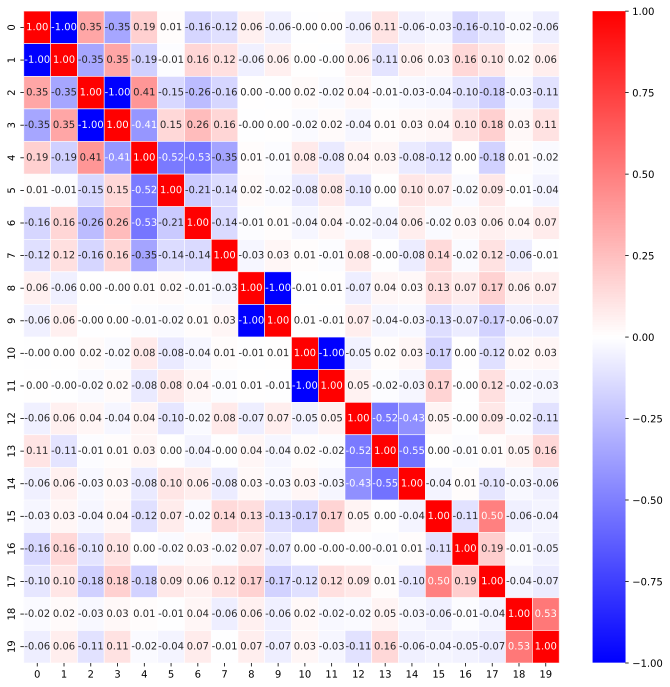

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(pd.DataFrame(np.c_[X_, y]).corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax, cmap='bwr')

##Conclusion
###To recap, note that the optimal performance that we were able to generate on a model was 85%. We achieved this with our Random Forest classifier, and with our Logistic Regression classifier (both of which were optimized without the use of PCA as a pre-processing step). 
###While we were not able to achieve our desired accuracy of 90%, we came close to our goal and thoroughly tested several classifiers, none of which exceeded 85% accuracy on the test data. 
###We recognize that our dataset was rather imbalanced, and that it was too limited for the models to learn enough from it to achieve a higher accuracy. 
###In the future, we would like to train models using a larger, more balanced dataset. Additionally, shrinking the number of features even further on this dataset would likely improve the model. Lastly, we would like to have examined more in-depth the relationship between features and possibly applying weights that would better express this. 
